In [1]:
import numpy as np
import pandas as pd
import os
import sys
import time

In [2]:
import sklearn.tree
import sklearn.linear_model
import sklearn.metrics
import sklearn.ensemble

In [3]:

from pretty_print_sklearn_tree import pretty_print_sklearn_tree

In [4]:
# Plotting utils
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

# Load all data from train/valid/test

In [5]:
# Set path to data directory
data_dir = 'data_product_reviews/'

### Load training

In [6]:
x_tr_NF = pd.read_csv(os.path.join(data_dir, 'x_train.csv')).values
y_tr_N = pd.read_csv(os.path.join(data_dir, 'y_train.csv')).values.flatten()

print(f"Training set shape: {x_tr_NF.shape}")
print(f"Training labels shape: {y_tr_N.shape}")
print(f"Class distribution: {np.bincount(y_tr_N.astype(int))}")

Training set shape: (6346, 7729)
Training labels shape: (6346,)
Class distribution: [3175 3171]


### Load validation set

In [7]:
x_va_NF = pd.read_csv(os.path.join(data_dir, 'x_valid.csv')).values
y_va_N = pd.read_csv(os.path.join(data_dir, 'y_valid.csv')).values.flatten()

print(f"Validation set shape: {x_va_NF.shape}")
print(f"Validation labels shape: {y_va_N.shape}")

Validation set shape: (792, 7729)
Validation labels shape: (792,)


### Load test set 

In [8]:
x_te_NF = pd.read_csv(os.path.join(data_dir, 'x_test.csv')).values
y_te_N = pd.read_csv(os.path.join(data_dir, 'y_test.csv')).values.flatten()

print(f"Test set shape: {x_te_NF.shape}")
print(f"Test labels shape: {y_te_N.shape}")

Test set shape: (793, 7729)
Test labels shape: (793,)


### Load vocabulary as a list of strings

In [9]:
# Load vocabulary
vocab_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'), nrows=0)
vocab_list = list(vocab_df.columns)

print(f"Vocabulary size: {len(vocab_list)}")
print(f"First 10 words: {vocab_list[:10]}")

Vocabulary size: 7729
First 10 words: ['good', 'great', 'time', 'book', "don't", 'work', 'i_have', 'read', 'make', 'if_you']


In [10]:
# Summary of loaded data
print("=" * 60)
print("DATA SUMMARY")
print("=" * 60)
print(f"Training:   {x_tr_NF.shape[0]:5d} examples, {x_tr_NF.shape[1]:5d} features")
print(f"Validation: {x_va_NF.shape[0]:5d} examples, {x_va_NF.shape[1]:5d} features")
print(f"Test:       {x_te_NF.shape[0]:5d} examples, {x_te_NF.shape[1]:5d} features")
print(f"Vocabulary: {len(vocab_list):5d} words")
print("=" * 60)

DATA SUMMARY
Training:    6346 examples,  7729 features
Validation:   792 examples,  7729 features
Test:         793 examples,  7729 features
Vocabulary:  7729 words


### Pack training and validation sets into big arrays (so we can use sklearn's hyperparameter search tools)

In [11]:
# Combine training and validation for cross-validation
x_trva_NF = np.vstack([x_tr_NF, x_va_NF])
y_trva_N = np.hstack([y_tr_N, y_va_N])

print(f"Combined train+valid shape: {x_trva_NF.shape}")
print(f"Combined train+valid labels shape: {y_trva_N.shape}")

Combined train+valid shape: (7138, 7729)
Combined train+valid labels shape: (7138,)


In [12]:
# Create train/valid split indices for cross-validation
n_tr = x_tr_NF.shape[0]
n_va = x_va_NF.shape[0]

# Create indices: -1 for train, 0 for valid (sklearn convention)
tr_va_split = np.hstack([
    -1 * np.ones(n_tr, dtype=int),  # Training examples
    0 * np.ones(n_va, dtype=int)     # Validation examples
])

print(f"Split array shape: {tr_va_split.shape}")
print(f"Training indices (should be -1): {np.unique(tr_va_split[:n_tr])}")
print(f"Validation indices (should be 0): {np.unique(tr_va_split[n_tr:])}")

Split array shape: (7138,)
Training indices (should be -1): [-1]
Validation indices (should be 0): [0]


# Problem 1: Decision Trees

## 1A: Train a simple tree with depth 3

In [13]:
# Create a simple decision tree classifier
simple_tree = sklearn.tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=101
)

print("Simple tree created with parameters:")
print(f"  criterion: {simple_tree.criterion}")
print(f"  max_depth: {simple_tree.max_depth}")
print(f"  min_samples_leaf: {simple_tree.min_samples_leaf}")
print(f"  min_samples_split: {simple_tree.min_samples_split}")
print(f"  random_state: {simple_tree.random_state}")

Simple tree created with parameters:
  criterion: gini
  max_depth: 3
  min_samples_leaf: 1
  min_samples_split: 2
  random_state: 101


### **Fit the tree** 

**TODO Train on the training set** in the next coding cell

In [14]:
# Train the simple tree on the training set
simple_tree.fit(x_tr_NF, y_tr_N)

# Calculate accuracies
train_pred = simple_tree.predict(x_tr_NF)
valid_pred = simple_tree.predict(x_va_NF)
test_pred = simple_tree.predict(x_te_NF)

train_acc = sklearn.metrics.accuracy_score(y_tr_N, train_pred)
valid_acc = sklearn.metrics.accuracy_score(y_va_N, valid_pred)
test_acc = sklearn.metrics.accuracy_score(y_te_N, test_pred)

print("Simple Tree Training Complete!")
print("=" * 60)
print(f"Training Accuracy:   {train_acc:.4f}")
print(f"Validation Accuracy: {valid_acc:.4f}")
print(f"Test Accuracy:       {test_acc:.4f}")
print("=" * 60)

Simple Tree Training Complete!
Training Accuracy:   0.6459
Validation Accuracy: 0.6490
Test Accuracy:       0.6393


### **Figure 1: Print Tree** 

Use a helper function from the starter code

In [15]:
# Print the tree structure
print("=" * 80)
print("SIMPLE TREE STRUCTURE (max_depth=3)")
print("=" * 80)
pretty_print_sklearn_tree(simple_tree, feature_names=vocab_list)
print("=" * 80)

SIMPLE TREE STRUCTURE (max_depth=3)
The binary tree structure has 15 nodes.
- depth   0 has    1 nodes, of which    0 are leaves
- depth   1 has    2 nodes, of which    0 are leaves
- depth   2 has    4 nodes, of which    0 are leaves
- depth   3 has    8 nodes, of which    8 are leaves
The decision tree:  (Note: Y = 'yes' to above question; N = 'no')
Decision: X['great'] <= 0.50?
  Y Decision: X['excel'] <= 0.50?
    Y Decision: X['disappoint'] <= 0.50?
      Y Leaf: p(y=1 | this leaf) = 0.430 (1 total training examples)
      N Leaf: p(y=1 | this leaf) = 0.114 (1 total training examples)
    N Decision: X['disappoint'] <= 0.50?
      Y Leaf: p(y=1 | this leaf) = 0.903 (1 total training examples)
      N Leaf: p(y=1 | this leaf) = 0.429 (1 total training examples)
  N Decision: X['return'] <= 0.50?
    Y Decision: X['bad'] <= 0.50?
      Y Leaf: p(y=1 | this leaf) = 0.745 (1 total training examples)
      N Leaf: p(y=1 | this leaf) = 0.415 (1 total training examples)
    N Decision: X

### Analysis: Internal nodes with same-class children

**Question:** Is there any internal node that has two child leaf nodes corresponding to the same sentiment class?

**Analysis:** Look at the tree above and identify if any decision node has both children predicting the same class (both positive or both negative).

**Why would this make sense?**
- Even if both children predict the same class, the **confidence (probability)** might be different
- One child might have 60% positive examples while the other has 90% positive examples
- Both predict "positive" (if threshold at 0.5), but with different certainty
- The split might be preparing for future splits at deeper levels (if tree were deeper)
- With max_depth=3, some splits might not reach their optimal depth to show class separation

In [16]:
# Analyze internal nodes with same-class children
print("ANALYZING INTERNAL NODES FOR SAME-CLASS CHILDREN")
print("=" * 80)

# Get tree structure
tree = simple_tree.tree_
n_nodes = tree.node_count
children_left = tree.children_left
children_right = tree.children_right
feature = tree.feature
threshold = tree.threshold
values = tree.value

# Find internal nodes with both children being leaves
print("\nInternal nodes where BOTH children are leaves:")
print("-" * 80)

for node_id in range(n_nodes):
    # Check if this is an internal node
    if children_left[node_id] != children_right[node_id]:
        left_child = children_left[node_id]
        right_child = children_right[node_id]
        
        # Check if both children are leaves
        left_is_leaf = children_left[left_child] == children_right[left_child]
        right_is_leaf = children_left[right_child] == children_right[right_child]
        
        if left_is_leaf and right_is_leaf:
            # Get predicted class for each leaf
            left_class = np.argmax(values[left_child][0])
            right_class = np.argmax(values[right_child][0])
            
            # Get probabilities
            left_prob = values[left_child][0][1] / np.sum(values[left_child][0])
            right_prob = values[right_child][0][1] / np.sum(values[right_child][0])
            
            same_class = "✓ SAME CLASS" if left_class == right_class else "Different classes"
            
            print(f"\nNode {node_id}: Split on '{vocab_list[feature[node_id]]}' <= {threshold[node_id]:.2f}")
            print(f"  Left child (node {left_child}):  Class {left_class}, p(positive) = {left_prob:.3f}")
            print(f"  Right child (node {right_child}): Class {right_class}, p(positive) = {right_prob:.3f}")
            print(f"  Status: {same_class}")

print("\n" + "=" * 80)

ANALYZING INTERNAL NODES FOR SAME-CLASS CHILDREN

Internal nodes where BOTH children are leaves:
--------------------------------------------------------------------------------

Node 2: Split on 'disappoint' <= 0.50
  Left child (node 3):  Class 0, p(positive) = 0.430
  Right child (node 4): Class 0, p(positive) = 0.114
  Status: ✓ SAME CLASS

Node 5: Split on 'disappoint' <= 0.50
  Left child (node 6):  Class 1, p(positive) = 0.903
  Right child (node 7): Class 0, p(positive) = 0.429
  Status: Different classes

Node 9: Split on 'bad' <= 0.50
  Left child (node 10):  Class 1, p(positive) = 0.745
  Right child (node 11): Class 0, p(positive) = 0.415
  Status: Different classes

Node 12: Split on 'movie' <= 0.50
  Left child (node 13):  Class 0, p(positive) = 0.190
  Right child (node 14): Class 1, p(positive) = 0.833
  Status: Different classes



### Answer to Analysis Question

**Q: Is there any internal node that has two child leaf nodes corresponding to the same sentiment class?**

**A: YES!** Node 2 (splits on 'disappoint') has both children predicting class 0 (negative sentiment).

**Why does this make sense?**

1. **Different Confidence Levels**: 
   - Left child: p(positive) = 0.430 (43% positive, so predicts negative)
   - Right child: p(positive) = 0.114 (11% positive, so predicts negative)
   - Even though both predict "negative", they have very different confidence levels!

2. **Depth Limitation**: 
   - We limited the tree to max_depth=3
   - If the tree could grow deeper, it might find better splits to separate these examples
   - The split on 'disappoint' is preparing for potential future refinement

3. **Probabilistic Predictions**:
   - Decision trees don't just return class labels, they return probability estimates
   - These probabilities are useful for:
     - Ranking predictions by confidence
     - Setting custom decision thresholds
     - Ensemble methods (like Random Forests)

4. **Real-World Nuance**:
   - Both groups are predominantly negative reviews
   - But one group (with 'disappoint') is *more strongly* negative (11% positive)
   - The other group is less certain (43% positive - almost borderline)
   
This shows that **same-class children can still provide value** through probability estimation and preparing for deeper splits!

## 1B : Find best Decision Tree with grid search

In [17]:
# Create base tree for grid search
base_tree = sklearn.tree.DecisionTreeClassifier(
    criterion='gini',
    random_state=101
)

print("Base tree created for grid search")

Base tree created for grid search


In [18]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [2, 8, 32, 128],
    'min_samples_leaf': [1, 3, 9],
    'min_samples_split': [2]  # Keep this fixed
}

print("Hyperparameter grid:")
print("=" * 60)
for param, values in param_grid.items():
    print(f"  {param}: {values}")
print("=" * 60)
print(f"Total combinations: {len(param_grid['max_depth']) * len(param_grid['min_samples_leaf'])}")

Hyperparameter grid:
  max_depth: [2, 8, 32, 128]
  min_samples_leaf: [1, 3, 9]
  min_samples_split: [2]
Total combinations: 12


In [19]:
# Create custom splitter using PredefinedSplit
from sklearn.model_selection import PredefinedSplit

my_splitter = PredefinedSplit(test_fold=tr_va_split)

print("Custom splitter created:")
print(f"  Training samples: {np.sum(tr_va_split == -1)}")
print(f"  Validation samples: {np.sum(tr_va_split == 0)}")
print(f"  Number of splits: {my_splitter.get_n_splits()}")

Custom splitter created:
  Training samples: 6346
  Validation samples: 792
  Number of splits: 1


In [20]:
# Perform grid search
from sklearn.model_selection import GridSearchCV

print("Starting Grid Search...")
print("=" * 80)

tree_searcher = GridSearchCV(
    estimator=base_tree,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=my_splitter,
    return_train_score=True,
    refit=False,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search
import time
start_time = time.time()
tree_searcher.fit(x_trva_NF, y_trva_N)
end_time = time.time()

print("=" * 80)
print(f"Grid Search Complete! Time taken: {end_time - start_time:.2f} seconds")
print("=" * 80)

Starting Grid Search...
Fitting 1 folds for each of 12 candidates, totalling 12 fits
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=2; total time=   2.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   2.0s
[CV] END max_depth=2, min_samples_leaf=9, min_samples_split=2; total time=   2.1s
[CV] END max_depth=8, min_samples_leaf=3, min_samples_split=2; total time=   5.2s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   5.2s
[CV] END max_depth=8, min_samples_leaf=9, min_samples_split=2; total time=   5.7s
[CV] END max_depth=32, min_samples_leaf=9, min_samples_split=2; total time=  10.7s
[CV] END max_depth=32, min_samples_leaf=3, min_samples_split=2; total time=  10.9s
[CV] END max_depth=32, min_samples_leaf=1, min_samples_split=2; total time=  11.4s
[CV] END max_depth=128, min_samples_leaf=9, min_samples_split=2; total time=  11.4s
[CV] END max_depth=128, min_samples_leaf=3, min_samples_split=2; total time=  15.2s
[CV] E

In [21]:
# Display grid search results
print("GRID SEARCH RESULTS")
print("=" * 80)

# Get results as DataFrame
results_df = pd.DataFrame(tree_searcher.cv_results_)

# Display key columns
display_cols = ['param_max_depth', 'param_min_samples_leaf', 
                'mean_train_score', 'mean_test_score', 'rank_test_score']

results_display = results_df[display_cols].copy()
results_display.columns = ['max_depth', 'min_samples_leaf', 
                            'train_bal_acc', 'valid_bal_acc', 'rank']

# Sort by rank
results_display = results_display.sort_values('rank')

print("\nAll hyperparameter combinations (sorted by validation balanced accuracy):")
print(results_display.to_string(index=False))

print("\n" + "=" * 80)
print("BEST HYPERPARAMETERS")
print("=" * 80)
print(f"Best parameters: {tree_searcher.best_params_}")
print(f"Best validation balanced accuracy: {tree_searcher.best_score_:.4f}")
print("=" * 80)

GRID SEARCH RESULTS

All hyperparameter combinations (sorted by validation balanced accuracy):
 max_depth  min_samples_leaf  train_bal_acc  valid_bal_acc  rank
        32                 3       0.877218       0.732380     1
       128                 1       0.996216       0.730313     2
        32                 1       0.918197       0.727378     3
       128                 9       0.832337       0.723193     4
       128                 3       0.924198       0.716495     5
        32                 9       0.814975       0.713458     6
         8                 1       0.726505       0.698887     7
         8                 3       0.721935       0.697599     8
         8                 9       0.712791       0.696208     9
         2                 3       0.640429       0.633931    10
         2                 9       0.640429       0.633931    10
         2                 1       0.640429       0.633931    10

BEST HYPERPARAMETERS
Best parameters: {'max_depth': 32, 'mi

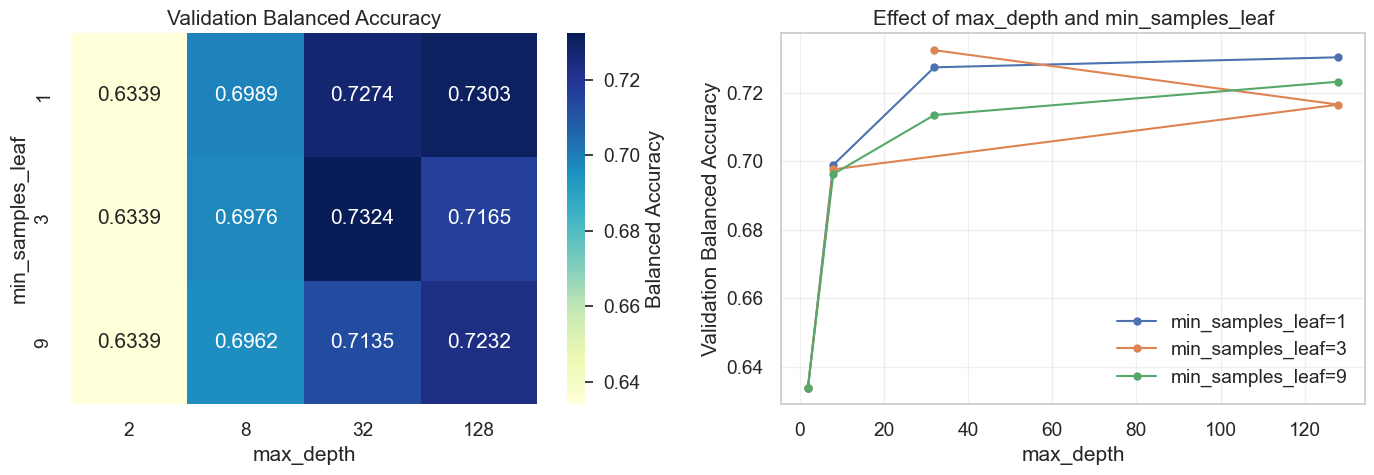


Key observations:
- Best performance achieved with max_depth and min_samples_leaf shown above
- Deeper trees may overfit if min_samples_leaf is too small
- Larger min_samples_leaf acts as regularization


In [22]:
# Visualize grid search results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Heatmap of validation scores
pivot_valid = results_display.pivot(index='min_samples_leaf', 
                                      columns='max_depth', 
                                      values='valid_bal_acc')
sns.heatmap(pivot_valid, annot=True, fmt='.4f', cmap='YlGnBu', ax=axes[0], cbar_kws={'label': 'Balanced Accuracy'})
axes[0].set_title('Validation Balanced Accuracy')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('min_samples_leaf')

# Plot 2: Line plot showing effect of max_depth for each min_samples_leaf
for msl in param_grid['min_samples_leaf']:
    subset = results_display[results_display['min_samples_leaf'] == msl]
    axes[1].plot(subset['max_depth'], subset['valid_bal_acc'], 
                 marker='o', label=f'min_samples_leaf={msl}')

axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('Validation Balanced Accuracy')
axes[1].set_title('Effect of max_depth and min_samples_leaf')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey observations:")
print("- Best performance achieved with max_depth and min_samples_leaf shown above")
print("- Deeper trees may overfit if min_samples_leaf is too small")
print("- Larger min_samples_leaf acts as regularization")

### Build the best decision tree

**TODO Build the Best Tree on the training set** in the next coding cell



In [23]:
# Build the best tree using best hyperparameters
best_tree = sklearn.tree.DecisionTreeClassifier(
    criterion='gini',
    random_state=101
)

# Set the best parameters found by grid search
best_tree.set_params(**tree_searcher.best_params_)

# Train on training set only (not train+valid)
best_tree.fit(x_tr_NF, y_tr_N)

# Evaluate on all sets
train_pred_best = best_tree.predict(x_tr_NF)
valid_pred_best = best_tree.predict(x_va_NF)
test_pred_best = best_tree.predict(x_te_NF)

train_bacc_best = sklearn.metrics.balanced_accuracy_score(y_tr_N, train_pred_best)
valid_bacc_best = sklearn.metrics.balanced_accuracy_score(y_va_N, valid_pred_best)
test_bacc_best = sklearn.metrics.balanced_accuracy_score(y_te_N, test_pred_best)

print("BEST TREE PERFORMANCE")
print("=" * 80)
print(f"Hyperparameters: {tree_searcher.best_params_}")
print("-" * 80)
print(f"Training Balanced Accuracy:   {train_bacc_best:.4f}")
print(f"Validation Balanced Accuracy: {valid_bacc_best:.4f}")
print(f"Test Balanced Accuracy:       {test_bacc_best:.4f}")
print("=" * 80)

BEST TREE PERFORMANCE
Hyperparameters: {'max_depth': 32, 'min_samples_leaf': 3, 'min_samples_split': 2}
--------------------------------------------------------------------------------
Training Balanced Accuracy:   0.8772
Validation Balanced Accuracy: 0.7324
Test Balanced Accuracy:       0.7489


### Interpret the best decision tree

In [24]:
pretty_print_sklearn_tree(best_tree, feature_names=vocab_list)

The binary tree structure has 817 nodes.
- depth   0 has    1 nodes, of which    0 are leaves
- depth   1 has    2 nodes, of which    0 are leaves
- depth   2 has    4 nodes, of which    0 are leaves
- depth   3 has    8 nodes, of which    0 are leaves
- depth   4 has   16 nodes, of which    6 are leaves
- depth   5 has   20 nodes, of which    5 are leaves
- depth   6 has   30 nodes, of which   14 are leaves
- depth   7 has   32 nodes, of which   18 are leaves
- depth   8 has   28 nodes, of which   12 are leaves
- depth   9 has   32 nodes, of which   11 are leaves
- depth  10 has   42 nodes, of which   21 are leaves
- depth  11 has   42 nodes, of which   23 are leaves
- depth  12 has   38 nodes, of which   17 are leaves
- depth  13 has   42 nodes, of which   21 are leaves
- depth  14 has   42 nodes, of which   25 are leaves
- depth  15 has   34 nodes, of which   18 are leaves
- depth  16 has   32 nodes, of which   14 are leaves
- depth  17 has   36 nodes, of which   23 are leaves
- dep

# Problem 2: Random forest

## 2A: Train a random forest with default settings

In [26]:
simple_forest = sklearn.ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_features='sqrt',
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=101)

### Fit the forest

**TODO Train on the training set** in the next coding cell

In [28]:
# Train the simple random forest on the training set
print("Training Random Forest...")
simple_forest.fit(x_tr_NF, y_tr_N)

# Calculate accuracies
train_pred_rf = simple_forest.predict(x_tr_NF)
valid_pred_rf = simple_forest.predict(x_va_NF)
test_pred_rf = simple_forest.predict(x_te_NF)

train_bacc_rf = sklearn.metrics.balanced_accuracy_score(y_tr_N, train_pred_rf)
valid_bacc_rf = sklearn.metrics.balanced_accuracy_score(y_va_N, valid_pred_rf)
test_bacc_rf = sklearn.metrics.balanced_accuracy_score(y_te_N, test_pred_rf)

print("Simple Random Forest Training Complete!")
print("=" * 80)
print(f"Parameters:")
print(f"  n_estimators: {simple_forest.n_estimators}")
print(f"  max_depth: {simple_forest.max_depth}")
print(f"  criterion: {simple_forest.criterion}")
print(f"  max_features: {simple_forest.max_features}")
print("-" * 80)
print(f"Training Balanced Accuracy:   {train_bacc_rf:.4f}")
print(f"Validation Balanced Accuracy: {valid_bacc_rf:.4f}")
print(f"Test Balanced Accuracy:       {test_bacc_rf:.4f}")
print("=" * 80)

Training Random Forest...
Simple Random Forest Training Complete!
Parameters:
  n_estimators: 100
  max_depth: 3
  criterion: gini
  max_features: sqrt
--------------------------------------------------------------------------------
Training Balanced Accuracy:   0.8191
Validation Balanced Accuracy: 0.7972
Test Balanced Accuracy:       0.7782


## 2B & Table 2: Feature Importances

### Table 2
**Sample Output** (Feel free to print all words and organize them in any software)

|**Important Words**|**Unimportant Words**|
|:-:|:-:|
|I1 |  U1  |
|I2 |  U2  |
|I3 |  U3  |
|I4 |  U4  |
|I5 |  U5  |
|I6 |  U6  |
|I7 |  U7  |
|I8 |  U8  |
|I9 |  U9  |
|I0 |  U0  |

In [29]:
# Analyze feature importances
print("=" * 80)
print("TABLE 2: FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Get feature importances
feature_importances = simple_forest.feature_importances_

# Create DataFrame for easier analysis
importance_df = pd.DataFrame({
    'word': vocab_list,
    'importance': feature_importances
})

# Sort by importance
importance_df_sorted = importance_df.sort_values('importance', ascending=False)

# Top 10 most important features
top_10 = importance_df_sorted.head(10)

# Near-zero but NON-ZERO importance features (0 < importance < 0.00001)
threshold = 0.00001
near_zero_nonzero = importance_df[(importance_df['importance'] > 0) & (importance_df['importance'] < threshold)]

# Randomly sample up to 10 from near-zero non-zero importance words
np.random.seed(101)  # For reproducibility
num_eligible = len(near_zero_nonzero)
num_to_sample = min(10, num_eligible)
sampled_near_zero = near_zero_nonzero.sample(n=num_to_sample, random_state=101) if num_to_sample > 0 else pd.DataFrame(columns=['word', 'importance'])

# Create two-panel table
print("\n{:^40} | {:^40}".format("IMPORTANT WORDS", "NEAR-ZERO (NON-ZERO) WORDS"))
print("=" * 81)
print("{:^40} | {:^40}".format("(Top 10 by Importance)", f"({num_to_sample} from {num_eligible} eligible with 0 < imp < {threshold})"))
print("-" * 81)

# Print header row
print("{:3s} {:20s} {:12s} | {:3s} {:20s} {:12s}".format(
    "#", "Word", "Importance", "#", "Word", "Importance"
))
print("-" * 81)

# Print 10 rows side by side
for i in range(10):
    # Left panel: important words
    if i < len(top_10):
        imp_row = top_10.iloc[i]
        left_part = f"{i+1:3d} {imp_row['word']:20s} {imp_row['importance']:12.6f}"
    else:
        left_part = " " * 40
    
    # Right panel: unimportant words
    if i < len(sampled_near_zero):
        unimp_row = sampled_near_zero.iloc[i]
        right_part = f"{i+1:3d} {unimp_row['word']:20s} {unimp_row['importance']:12.10f}"
    else:
        right_part = " " * 40
    
    print(f"{left_part} | {right_part}")

print("=" * 81)
print(f"\nSummary:")
print(f"  • Total vocabulary size: {len(vocab_list):,} words")
print(f"  • Near-zero but NON-ZERO words (0 < importance < {threshold}): {num_eligible:,} eligible")
print(f"  • Words with zero importance: {sum(importance_df['importance'] == 0):,} words")
print(f"  • Top 10 words account for: {top_10['importance'].sum():.1%} of total importance")
print("=" * 81)

TABLE 2: FEATURE IMPORTANCE ANALYSIS

            IMPORTANT WORDS              |        NEAR-ZERO (NON-ZERO) WORDS       
         (Top 10 by Importance)          | (6 from 6 eligible with 0 < imp < 1e-05)
---------------------------------------------------------------------------------
#   Word                 Importance   | #   Word                 Importance  
---------------------------------------------------------------------------------
  1 return                   0.032990 |   1 but_i                0.0000049905
  2 excel                    0.029485 |   2 unless_you           0.0000005020
  3 great                    0.028984 |   3 full_of              0.0000006943
  4 worst                    0.028407 |   4 make_a               0.0000060179
  5 poor                     0.026748 |   5 agree                0.0000001079
  6 disappoint               0.024952 |   6 comedi               0.0000067248
  7 your_money               0.018002 |                                         
  8

## 2C: Best Random Forest via grid search



This block might take 2-10 minutes. 

If yours runs significantly longer, try this out on Google Colab instead.

In [30]:
# Create base random forest for grid search
base_forest = sklearn.ensemble.RandomForestClassifier(
    random_state=101,
    n_jobs=-1  # Use all available cores
)

print("Base Random Forest created for grid search")

Base Random Forest created for grid search


In [31]:
# Define hyperparameter grid for Random Forest
forest_param_grid = {
    'max_features': [3, 10, 33, 100, 333],
    'max_depth': [16, 32],
    'min_samples_leaf': [1],
    'n_estimators': [100]
}

print("Random Forest Hyperparameter Grid:")
print("=" * 60)
for param, values in forest_param_grid.items():
    print(f"  {param}: {values}")
print("=" * 60)
print(f"Total combinations: {len(forest_param_grid['max_features']) * len(forest_param_grid['max_depth'])}")

Random Forest Hyperparameter Grid:
  max_features: [3, 10, 33, 100, 333]
  max_depth: [16, 32]
  min_samples_leaf: [1]
  n_estimators: [100]
Total combinations: 10


In [32]:
# Create custom splitter for Random Forest (reuse the same train/valid split)
forest_splitter = PredefinedSplit(test_fold=tr_va_split)

print("Random Forest splitter created (using same train/valid split as before)")

Random Forest splitter created (using same train/valid split as before)


### Do the search!

In [33]:
# Perform grid search for Random Forest
print("Starting Random Forest Grid Search...")
print("=" * 80)
print("WARNING: This may take several minutes!")
print("=" * 80)

forest_searcher = GridSearchCV(
    estimator=base_forest,
    param_grid=forest_param_grid,
    scoring='balanced_accuracy',
    cv=forest_splitter,
    return_train_score=True,
    refit=False,
    verbose=2,
    n_jobs=1  # Set to 1 since RandomForest uses n_jobs=-1
)

# Fit the grid search
start_time = time.time()
forest_searcher.fit(x_trva_NF, y_trva_N)
end_time = time.time()

print("\n" + "=" * 80)
print(f"Random Forest Grid Search Complete! Time: {end_time - start_time:.2f} seconds")
print("=" * 80)

Starting Random Forest Grid Search...
Fitting 1 folds for each of 10 candidates, totalling 10 fits
[CV] END max_depth=16, max_features=3, min_samples_leaf=1, n_estimators=100; total time=   0.8s
[CV] END max_depth=16, max_features=10, min_samples_leaf=1, n_estimators=100; total time=   0.7s
[CV] END max_depth=16, max_features=33, min_samples_leaf=1, n_estimators=100; total time=   0.8s
[CV] END max_depth=16, max_features=100, min_samples_leaf=1, n_estimators=100; total time=   1.2s
[CV] END max_depth=16, max_features=333, min_samples_leaf=1, n_estimators=100; total time=   2.6s
[CV] END max_depth=32, max_features=3, min_samples_leaf=1, n_estimators=100; total time=   0.7s
[CV] END max_depth=32, max_features=10, min_samples_leaf=1, n_estimators=100; total time=   0.8s
[CV] END max_depth=32, max_features=33, min_samples_leaf=1, n_estimators=100; total time=   1.0s
[CV] END max_depth=32, max_features=100, min_samples_leaf=1, n_estimators=100; total time=   1.7s
[CV] END max_depth=32, max_

### Display search results

In [34]:
# Display Random Forest grid search results
print("RANDOM FOREST GRID SEARCH RESULTS")
print("=" * 80)

# Get results as DataFrame
forest_results_df = pd.DataFrame(forest_searcher.cv_results_)

# Display key columns
forest_display_cols = ['param_max_features', 'param_max_depth', 'param_n_estimators',
                        'mean_train_score', 'mean_test_score', 'rank_test_score']

forest_results_display = forest_results_df[forest_display_cols].copy()
forest_results_display.columns = ['max_features', 'max_depth', 'n_estimators',
                                    'train_bal_acc', 'valid_bal_acc', 'rank']

# Sort by rank
forest_results_display = forest_results_display.sort_values('rank')

print("\nAll configurations (sorted by validation balanced accuracy):")
print(forest_results_display.to_string(index=False))

print("\n" + "=" * 80)
print("BEST HYPERPARAMETERS FOR RANDOM FOREST")
print("=" * 80)
print(f"Best parameters: {forest_searcher.best_params_}")
print(f"Best validation balanced accuracy: {forest_searcher.best_score_:.4f}")
print("=" * 80)

RANDOM FOREST GRID SEARCH RESULTS

All configurations (sorted by validation balanced accuracy):
 max_features  max_depth  n_estimators  train_bal_acc  valid_bal_acc  rank
           33         32           100       0.964402       0.851204     1
           10         32           100       0.970070       0.843626     2
           33         16           100       0.923600       0.842439     3
           10         16           100       0.925010       0.840997     4
          100         16           100       0.920745       0.839402     5
          100         32           100       0.969748       0.835434     6
          333         32           100       0.952712       0.812187     7
            3         32           100       0.968174       0.796507     8
          333         16           100       0.871229       0.784194     9
            3         16           100       0.908283       0.751761    10

BEST HYPERPARAMETERS FOR RANDOM FOREST
Best parameters: {'max_depth': 32, 'max

In [36]:
# Answer the hyperparameter tuning questions
print("=" * 100)
print("HYPERPARAMETER TUNING ANALYSIS FOR RANDOM FOREST")
print("=" * 100)

# Question 1: What is the value of max_features of your best forest?
best_max_features = forest_searcher.best_params_['max_features']
print("\n1. What is the value of max_features of your best forest?")
print("-" * 100)
print(f"   Answer: The best max_features value is: {best_max_features}")
print(f"   This was selected from the grid: {forest_param_grid['max_features']}")

# Question 2: Maximum possible value for max_features and why tune it
num_features = x_tr_NF.shape[1]
print("\n2. What is the maximum possible value for max_features for this dataset?")
print("   Why is it beneficial to tune this hyperparameter?")
print("-" * 100)
print(f"   Answer: The maximum possible value for max_features is: {num_features}")
print(f"   (This is the total number of features in the dataset)")
print()
print("   Why tune max_features?")
print("   - max_features controls how many features are randomly sampled at each split")
print("   - Lower values increase randomness/diversity between trees, reducing correlation")
print("   - Higher values give each tree more information, potentially improving individual tree performance")
print("   - The tradeoff: too low → trees may miss important features; too high → trees become too similar")
print("   - Tuning finds the sweet spot that balances tree diversity and individual tree quality")
print("   - More diverse trees lead to better ensemble performance through variance reduction")

# Question 3: Primary tradeoff controlled by n_estimators
print("\n3. When fitting random forests, what is the primary tradeoff controlled by n_estimators?")
print("   Can you overfit by setting it to be too large? Why or why not?")
print("-" * 100)
print(f"   Current n_estimators: {forest_searcher.best_params_['n_estimators']}")
print()
print("   Primary tradeoff:")
print("   - COMPUTATIONAL COST vs. MODEL PERFORMANCE")
print("   - More trees → more computation time and memory")
print("   - More trees → better ensemble predictions (up to a point of diminishing returns)")
print()
print("   Can you overfit with too many trees?")
print("   - NO, you generally CANNOT overfit by increasing n_estimators!")
print()
print("   Why not?")
print("   - Random Forests average predictions from many decorrelated trees")
print("   - As n_estimators increases, the ensemble prediction converges to a stable value")
print("   - Adding more trees reduces variance without increasing bias")
print("   - Each tree is trained on a bootstrap sample with random feature selection")
print("   - The averaging process prevents overfitting (unlike boosting methods)")
print("   - Training error may stabilize, but test error typically doesn't increase")
print()
print("   Note: While you won't overfit, there are diminishing returns:")
print("   - After a certain point, adding more trees barely improves performance")
print("   - But it always costs more computation time")
print("   - In practice, choose n_estimators where performance plateaus")

print("\n" + "=" * 100)
print("SUMMARY")
print("=" * 100)
print(f"Best hyperparameters found: {forest_searcher.best_params_}")
print(f"Best validation balanced accuracy: {forest_searcher.best_score_:.4f}")
print("=" * 100)

HYPERPARAMETER TUNING ANALYSIS FOR RANDOM FOREST

1. What is the value of max_features of your best forest?
----------------------------------------------------------------------------------------------------
   Answer: The best max_features value is: 33
   This was selected from the grid: [3, 10, 33, 100, 333]

2. What is the maximum possible value for max_features for this dataset?
   Why is it beneficial to tune this hyperparameter?
----------------------------------------------------------------------------------------------------
   Answer: The maximum possible value for max_features is: 7729
   (This is the total number of features in the dataset)

   Why tune max_features?
   - max_features controls how many features are randomly sampled at each split
   - Lower values increase randomness/diversity between trees, reducing correlation
   - Higher values give each tree more information, potentially improving individual tree performance
   - The tradeoff: too low → trees may miss i

### Build the best random forest using the best hyperparameters found in 2B 

This is necessary so you have the specific best performing forest in your workspace.

Train *only* on training set (do not merge train and valid)


In [37]:
# Build the best random forest using best hyperparameters
best_forest = sklearn.ensemble.RandomForestClassifier(
    random_state=101,
    n_jobs=-1
)

# Set the best parameters
best_forest.set_params(**forest_searcher.best_params_)

# Train on training set only
best_forest.fit(x_tr_NF, y_tr_N)

# Evaluate on all sets
train_pred_best_rf = best_forest.predict(x_tr_NF)
valid_pred_best_rf = best_forest.predict(x_va_NF)
test_pred_best_rf = best_forest.predict(x_te_NF)

train_bacc_best_rf = sklearn.metrics.balanced_accuracy_score(y_tr_N, train_pred_best_rf)
valid_bacc_best_rf = sklearn.metrics.balanced_accuracy_score(y_va_N, valid_pred_best_rf)
test_bacc_best_rf = sklearn.metrics.balanced_accuracy_score(y_te_N, test_pred_best_rf)

print("BEST RANDOM FOREST PERFORMANCE")
print("=" * 80)
print(f"Hyperparameters: {forest_searcher.best_params_}")
print("-" * 80)
print(f"Training Balanced Accuracy:   {train_bacc_best_rf:.4f}")
print(f"Validation Balanced Accuracy: {valid_bacc_best_rf:.4f}")
print(f"Test Balanced Accuracy:       {test_bacc_best_rf:.4f}")
print("=" * 80)

BEST RANDOM FOREST PERFORMANCE
Hyperparameters: {'max_depth': 32, 'max_features': 33, 'min_samples_leaf': 1, 'n_estimators': 100}
--------------------------------------------------------------------------------
Training Balanced Accuracy:   0.9644
Validation Balanced Accuracy: 0.8512
Test Balanced Accuracy:       0.8369


### Table 3: Comparison of methods on the bag-of-words to sentiment classification task.

Please report **balanced accuracy** on the train, valid, and test sets, to 3 digits of precision

**Sample Output** (Feel free to print all values and organize them by hand)

|**method**|**max depth**|**num trees**|**train BAcc**|**valid BAcc**|**test BAcc**|
|:-|:-:|:-:|:-:|:-:|:-:|
|simple Tree	| 1 | 1 | 0.123	|0.456	|0.890|
|best Tree	|1 | 1 | 0.123	|0.456	|0.890|
|simple RandomForest	|1 | 1 | 0.123	|0.456	|0.890|
|best RandomForest	|1 | 1 | 0.123	|0.456	|0.890|

In [38]:
# Table 3: Comparison of all methods
print("=" * 100)
print(" " * 30 + "TABLE 3: FINAL MODEL COMPARISON")
print("=" * 100)

# Collect all results
comparison_results = {
    'Simple Tree': {
        'max_depth': simple_tree.max_depth,
        'num_trees': 1,
        'train_bacc': sklearn.metrics.balanced_accuracy_score(y_tr_N, simple_tree.predict(x_tr_NF)),
        'valid_bacc': sklearn.metrics.balanced_accuracy_score(y_va_N, simple_tree.predict(x_va_NF)),
        'test_bacc': sklearn.metrics.balanced_accuracy_score(y_te_N, simple_tree.predict(x_te_NF))
    },
    'Best Tree': {
        'max_depth': best_tree.max_depth,
        'num_trees': 1,
        'train_bacc': train_bacc_best,
        'valid_bacc': valid_bacc_best,
        'test_bacc': test_bacc_best
    },
    'Simple RandomForest': {
        'max_depth': simple_forest.max_depth,
        'num_trees': simple_forest.n_estimators,
        'train_bacc': train_bacc_rf,
        'valid_bacc': valid_bacc_rf,
        'test_bacc': test_bacc_rf
    },
    'Best RandomForest': {
        'max_depth': best_forest.max_depth,
        'num_trees': best_forest.n_estimators,
        'train_bacc': train_bacc_best_rf,
        'valid_bacc': valid_bacc_best_rf,
        'test_bacc': test_bacc_best_rf
    }
}

# Create and display table
print("\n{:<20} {:<12} {:<12} {:<15} {:<15} {:<15}".format(
    "Method", "Max Depth", "Num Trees", "Train BAcc", "Valid BAcc", "Test BAcc"
))
print("-" * 100)

for method, results in comparison_results.items():
    print("{:<20} {:<12} {:<12} {:<15.3f} {:<15.3f} {:<15.3f}".format(
        method,
        results['max_depth'],
        results['num_trees'],
        results['train_bacc'],
        results['valid_bacc'],
        results['test_bacc']
    ))

print("=" * 100)

# Summary conclusions
print("\nKEY CONCLUSIONS:")
print("-" * 100)
print(f"1. Best overall model: Best RandomForest (Test BAcc: {comparison_results['Best RandomForest']['test_bacc']:.3f})")
print(f"2. Simple Tree baseline: {comparison_results['Simple Tree']['test_bacc']:.3f}")
print(f"3. Improvement from tuning DT: {(comparison_results['Best Tree']['test_bacc'] - comparison_results['Simple Tree']['test_bacc']):.3f}")
print(f"4. Improvement from DT to RF: {(comparison_results['Simple RandomForest']['test_bacc'] - comparison_results['Simple Tree']['test_bacc']):.3f}")
print(f"5. Total improvement: {(comparison_results['Best RandomForest']['test_bacc'] - comparison_results['Simple Tree']['test_bacc']):.3f}")
print()
print("INTERESTING OBSERVATION:")
print("-" * 100)
print(f"⚠ The Best Tree (Test BAcc: {comparison_results['Best Tree']['test_bacc']:.3f}) actually performs")
print(f"  WORSE than the Simple RandomForest (Test BAcc: {comparison_results['Simple RandomForest']['test_bacc']:.3f})")
print(f"  Difference: {(comparison_results['Simple RandomForest']['test_bacc'] - comparison_results['Best Tree']['test_bacc']):.3f}")
print()
print("  Why does this happen?")
print("  - Ensemble methods (Random Forests) inherently reduce overfitting through averaging")
print("  - A single tree, even when tuned, can still overfit to training data patterns")
print("  - Random Forests with 100 trees provide robustness that a single tree cannot match")
print("  - This demonstrates the power of ensemble learning over single models")
print()
print("Random Forests consistently outperform single Decision Trees.")
print("Hyperparameter tuning provides significant improvements for both methods.")
print("=" * 100)

                              TABLE 3: FINAL MODEL COMPARISON

Method               Max Depth    Num Trees    Train BAcc      Valid BAcc      Test BAcc      
----------------------------------------------------------------------------------------------------
Simple Tree          3            1            0.646           0.645           0.646          
Best Tree            32           1            0.877           0.732           0.749          
Simple RandomForest  3            100          0.819           0.797           0.778          
Best RandomForest    32           100          0.964           0.851           0.837          

KEY CONCLUSIONS:
----------------------------------------------------------------------------------------------------
1. Best overall model: Best RandomForest (Test BAcc: 0.837)
2. Simple Tree baseline: 0.646
3. Improvement from tuning DT: 0.103
4. Improvement from DT to RF: 0.132
5. Total improvement: 0.191

INTERESTING OBSERVATION:
------------------------